Importing the Dependencies

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [3]:
# first 5 rows of the dataset
credit_card_data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62    0.0  
1  0.125895 -0.008983  0.014724    2.69    0.0  
2 -0.139097 -0.055353 -0.059752  378.66    0.0  
3 -0.221929  0.062723  0.061458  123.50    0.0  
4  0.502292  0.219422  0.215153   69.99    0.0  

[5 rows x 31 columns]

In [4]:
credit_card_data.tail()

Time        V1        V2        V3        V4        V5        V6  \
73372  55105  1.104021 -1.123835  1.008939 -0.460960 -1.502758  0.021138   
73373  55105  1.182898 -0.283273  1.123494  0.066948 -1.283276 -0.900451   
73374  55106  1.168124 -0.122507  1.251822  0.860341 -1.020137 -0.277310   
73375  55106 -0.339385 -2.095670  0.271543 -3.066469  0.484794  3.870704   
73376  55107 -1.020407  0.160171  0.152264 -0.093406 -0.978017  0.074549   

             V7        V8        V9  ...       V21       V22       V23  \
73372 -1.055043  0.095135 -0.175413  ...  0.405906  1.054006 -0.174455   
73373 -0.441870 -0.150647  0.784691  ...  0.082278  0.491790 -0.025468   
73374 -0.557856  0.023732  0.802378  ... -0.077921 -0.005984  0.014309   
73375 -2.069399  0.184347 -1.615958  ...  0.964115 -0.266112 -0.993763   
73376  1.610152  0.117407 -0.948643  ...  0.109380 -0.400171  0.835422   

            V24       V25       V26       V27       V28  Amount  Class  
73372  0.155852  0.358077 -0.030114  0.048490  0.042121  119.00    0.0  
73373  1.078368  0.258355  1.415871 -0.060454  0.014606   22.71    0.0  
73374  0.452036  0.281031  0.313100  0.020995  0.030389   16.35    0.0  
73375  1.033766  0.748706 -0.116168  0.153607  0.268881  322.34    0.0  
73376 -0.428141 -0.464220       NaN       NaN       NaN     NaN    NaN  

[5 rows x 31 columns]

In [5]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73377 entries, 0 to 73376
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    73377 non-null  int64  
 1   V1      73377 non-null  float64
 2   V2      73377 non-null  float64
 3   V3      73377 non-null  float64
 4   V4      73377 non-null  float64
 5   V5      73377 non-null  float64
 6   V6      73377 non-null  float64
 7   V7      73377 non-null  float64
 8   V8      73377 non-null  float64
 9   V9      73377 non-null  float64
 10  V10     73377 non-null  float64
 11  V11     73377 non-null  float64
 12  V12     73377 non-null  float64
 13  V13     73377 non-null  float64
 14  V14     73377 non-null  float64
 15  V15     73377 non-null  float64
 16  V16     73377 non-null  float64
 17  V17     73377 non-null  float64
 18  V18     73377 non-null  float64
 19  V19     73377 non-null  float64
 20  V20     73377 non-null  float64
 21  V21     73377 non-null  float64
 22

In [6]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0.0    73198
1.0      178
Name: count, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [8]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(73198, 31)
(178, 31)


In [10]:
# statistical measures of the data
legit.Amount.describe()

count    73198.000000
mean        97.324727
std        270.324183
min          0.000000
25%          7.680000
50%         26.675000
75%         88.947500
max      19656.530000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     178.000000
mean       95.191461
std       218.660540
min         0.000000
25%         1.000000
50%         7.595000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [12]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0.0    35597.170893 -0.237300 -0.038920  0.702672  0.155577 -0.260766   
1.0    30706.921348 -6.783789  4.890766 -9.107666  5.286608 -5.047343   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0.0    0.103663 -0.096812  0.047751  0.017704  ...  0.044057 -0.030721   
1.0   -2.085865 -7.104280  3.332048 -3.159344  ...  0.420153  0.813143   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0.0   -0.106049 -0.038141  0.006549  0.135145  0.023827  0.000959  0.002925   
1.0   -0.191093 -0.236559 -0.071391  0.249935  0.106447  0.567944  0.044848   

          Amount  
Class             
0.0    97.324727  
1.0    95.191461  

[2 rows x 30 columns]

Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [13]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [14]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [15]:
new_dataset.head()

Time        V1        V2        V3        V4        V5        V6  \
856      650 -0.440732  1.032815  1.367832 -0.055192  0.156301 -0.301038   
33887  37425 -1.780106  1.611252  0.569264 -0.572272  0.404643  0.142052   
5577    5726  0.593305 -0.954352 -0.493094  0.861260 -0.135350 -0.018209   
60174  49194  1.313851 -1.132929  0.219158 -1.473782 -1.198424 -0.372259   
17393  28677 -1.865201  2.741949 -1.460108  0.802284 -0.885586 -1.062425   

             V7        V8        V9  ...       V21       V22       V23  \
856    0.539671  0.203222 -0.660625  ... -0.171483 -0.431693  0.031401   
33887  0.477076  0.422000 -0.038297  ... -0.070304 -0.209801 -0.389634   
5577   0.493690 -0.223737  1.245957  ... -0.004812 -0.484567 -0.535545   
60174 -0.764947 -0.025082 -2.314729  ... -0.528566 -1.380412  0.252135   
17393 -0.503020  1.570530 -1.031615  ...  0.276567  0.691122  0.242434   

            V24       V25       V26       V27       V28  Amount  Class  
856    0.170349 -0.293095  0.071746  0.257613  0.086598    4.95    0.0  
33887 -0.848241  0.530613  0.432049 -0.264566 -0.070755    1.05    0.0  
5577  -0.509408  0.583817  0.513713 -0.155059  0.038810  368.00    0.0  
60174 -0.064305 -0.044910 -0.636081  0.016867  0.022369   79.95    0.0  
17393  0.355385 -0.458681 -0.412470  0.255673  0.154556    1.79    0.0  

[5 rows x 31 columns]

In [16]:
new_dataset.tail()

Time        V1        V2        V3        V4        V5        V6  \
69498  53451  0.385108  1.217620 -1.953872  2.087076 -1.144225 -0.576888   
69980  53658 -1.739341  1.344521 -0.534379  3.195291 -0.416196 -1.261961   
70141  53727 -1.649279  1.263974 -1.050826  2.237991 -2.527889 -0.889940   
70589  53937 -2.042608  1.573578 -2.372652 -0.572676 -2.097353 -0.174142   
72757  54846 -2.986466 -0.000891  0.605887  0.338338  0.685448 -1.581954   

             V7        V8        V9  ...       V21       V22       V23  \
69498 -2.582865  0.643230 -1.191233  ...  0.594623  0.372144 -0.310456   
69980 -2.340991  0.713004 -1.416265  ...  0.383180 -0.213952 -0.336640   
70141 -2.355254  0.854659 -1.281243  ...  0.679176  0.731907  0.333045   
70589 -3.039520 -1.634233 -0.594809  ... -0.723326  0.501222 -0.696892   
72757  0.504206 -0.233403  0.636768  ... -0.875146 -0.509849  1.313918   

            V24       V25       V26       V27       V28  Amount  Class  
69498 -0.624065  0.840216 -0.159452  0.599482  0.288916    8.00    1.0  
69980  0.237076  0.246003 -0.044228  0.510729  0.220952    0.00    1.0  
70141  0.392505 -0.274197  0.802349  0.390809  0.112146  112.45    1.0  
70589 -0.600514  0.127547 -0.786072  0.606097  0.171697  261.87    1.0  
72757  0.355065  0.448552  0.193490  1.214588 -0.013923    1.79    1.0  

[5 rows x 31 columns]

In [17]:
new_dataset['Class'].value_counts()

Class
0.0    492
1.0    178
Name: count, dtype: int64

In [18]:
new_dataset.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0.0    35426.786585 -0.283180 -0.071179  0.650468  0.184943 -0.253370   
1.0    30706.921348 -6.783789  4.890766 -9.107666  5.286608 -5.047343   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0.0    0.089428 -0.176606  0.040403  0.003502  ...  0.079276 -0.076748   
1.0   -2.085865 -7.104280  3.332048 -3.159344  ...  0.420153  0.813143   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0.0   -0.072663 -0.112475  0.000564  0.127969 -0.037264  0.053035 -0.017903   
1.0   -0.191093 -0.236559 -0.071391  0.249935  0.106447  0.567944  0.044848   

           Amount  
Class              
0.0    100.281829  
1.0     95.191461  

[2 rows x 30 columns]

Splitting the data into Features & Targets

In [34]:
total_transactions = len(credit_card_data)
transaction_counts = credit_card_data['Class'].value_counts()
fraudulent_transactions = transaction_counts[1]
non_fraudulent_transactions = transaction_counts[0]
percentage_fraudulent = (fraudulent_transactions / total_transactions) * 100
print(f"Percentage of fraudulent transactions: {percentage_fraudulent:.2f}%")

labels = ['Non-Fraudulent', 'Fraudulent']
sizes = [non_fraudulent_transactions, fraudulent_transactions]
colors = ['blue', 'red']
explode = (0.1, 0)

Percentage of fraudulent transactions: 0.24%


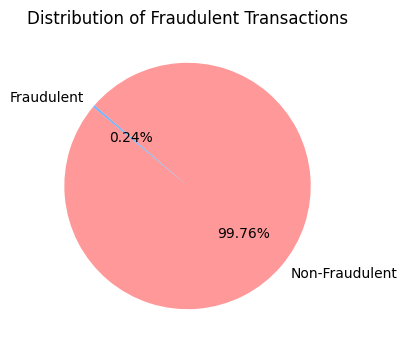

In [35]:
plt.figure(figsize=(10, 4))
plt.pie(sizes, labels=labels, autopct='%2.2f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Fraudulent Transactions')
plt.savefig('Distribution of Fraudulent Transactions')
plt.show()

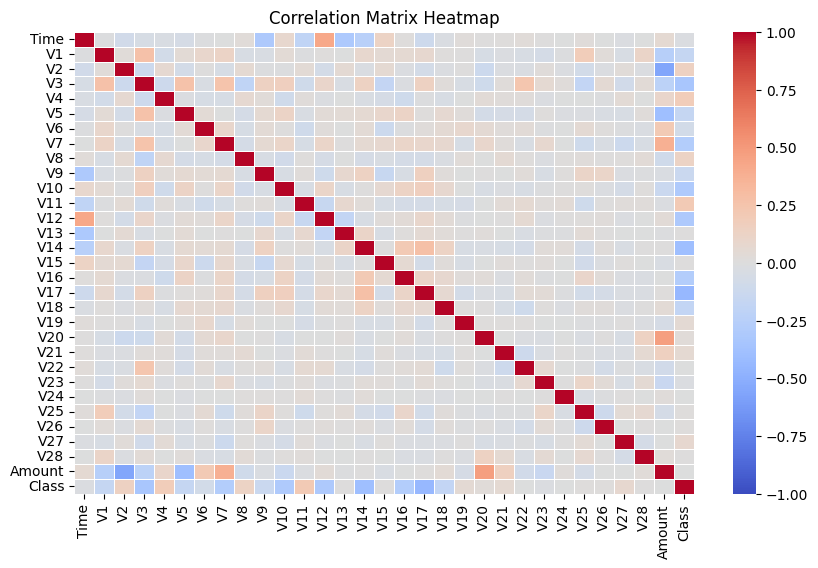

In [36]:
correlation_matrix=credit_card_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,cmap='coolwarm',vmin=-1,vmax=1,annot=False,linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

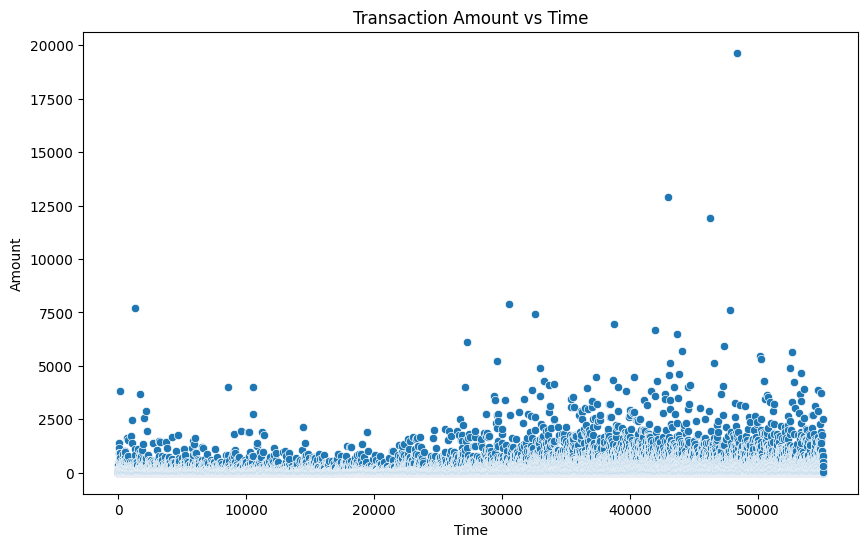

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', data=credit_card_data)
plt.title('Transaction Amount vs Time')
plt.show()

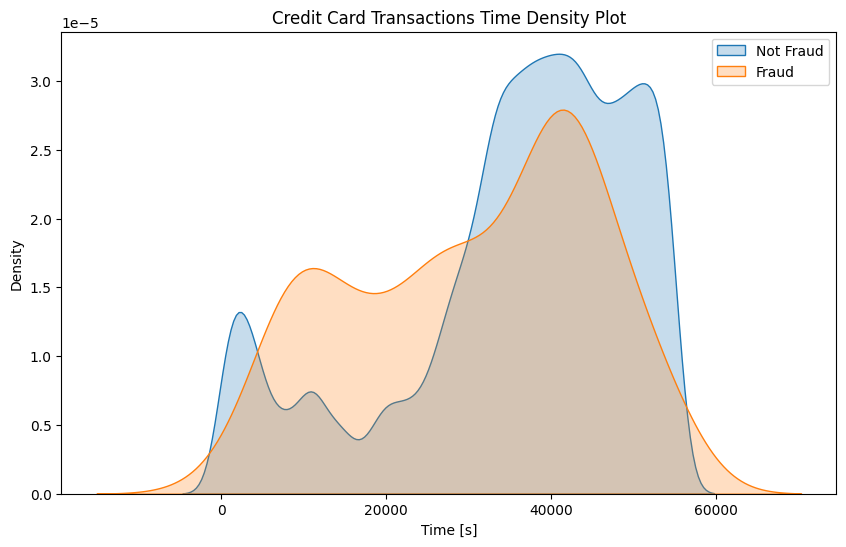

In [38]:
credit_card_data['Time'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)

class_0 = credit_card_data.loc[credit_card_data['Class'] == 0]["Time"]
class_1 = credit_card_data.loc[credit_card_data['Class'] == 1]["Time"]

plt.figure(figsize=(10, 6))
sns.kdeplot(class_0, label='Not Fraud', fill=True, common_norm=False)
sns.kdeplot(class_1, label='Fraud', fill=True, common_norm=False)

plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Time [s]')
plt.ylabel('Density')
plt.legend()

plt.show()

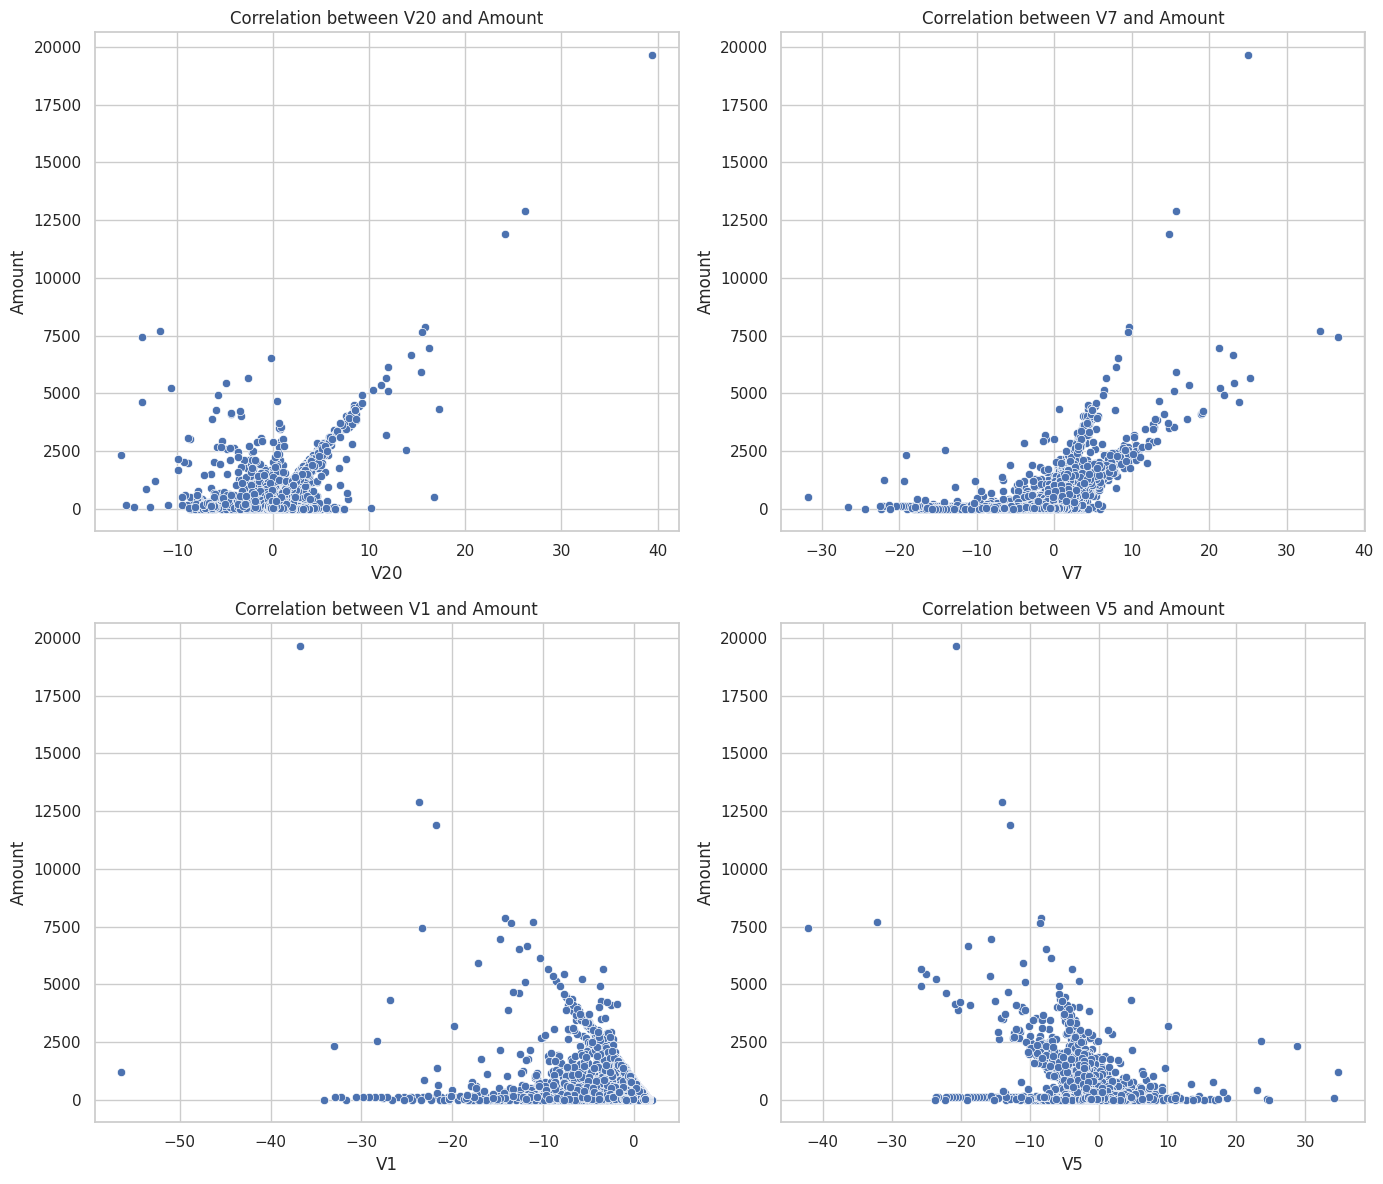

In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x='V20', y='Amount', data=credit_card_data)
plt.title('Correlation between V20 and Amount')
plt.xlabel('V20')
plt.ylabel('Amount')

plt.subplot(2, 2, 2)
sns.scatterplot(x='V7', y='Amount', data=credit_card_data)
plt.title('Correlation between V7 and Amount')
plt.xlabel('V7')
plt.ylabel('Amount')

plt.subplot(2, 2, 3)
sns.scatterplot(x='V1', y='Amount', data=credit_card_data)
plt.title('Correlation between V1 and Amount')
plt.xlabel('V1')
plt.ylabel('Amount')

plt.subplot(2, 2, 4)
sns.scatterplot(x='V5', y='Amount', data=credit_card_data)
plt.title('Correlation between V5 and Amount')
plt.xlabel('V5')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

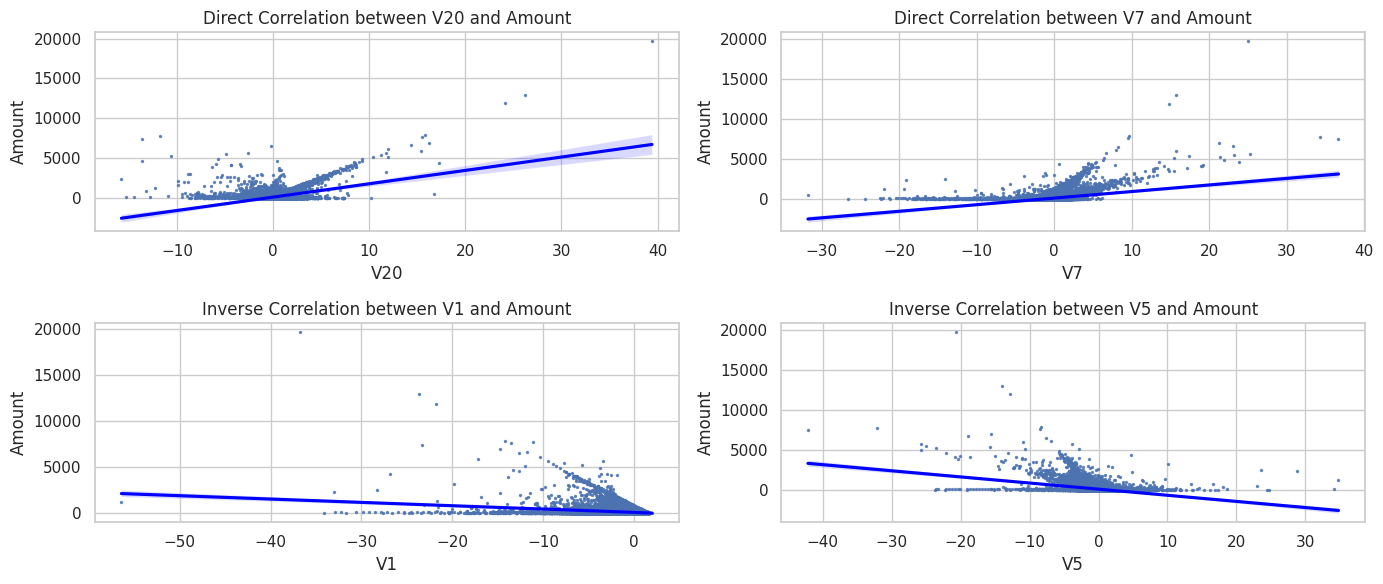

In [40]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.regplot(x='V20', y='Amount', data=credit_card_data, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Direct Correlation between V20 and Amount')
plt.xlabel('V20')
plt.ylabel('Amount')

plt.subplot(2, 2, 2)
sns.regplot(x='V7', y='Amount', data=credit_card_data, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Direct Correlation between V7 and Amount')
plt.xlabel('V7')
plt.ylabel('Amount')

plt.subplot(2, 2, 3)
sns.regplot(x='V1', y='Amount', data=credit_card_data, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Inverse Correlation between V1 and Amount')
plt.xlabel('V1')
plt.ylabel('Amount')

plt.subplot(2, 2, 4)
sns.regplot(x='V5', y='Amount', data=credit_card_data, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Inverse Correlation between V5 and Amount')
plt.xlabel('V5')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

In [19]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [20]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
856      650 -0.440732  1.032815  1.367832 -0.055192  0.156301 -0.301038   
33887  37425 -1.780106  1.611252  0.569264 -0.572272  0.404643  0.142052   
5577    5726  0.593305 -0.954352 -0.493094  0.861260 -0.135350 -0.018209   
60174  49194  1.313851 -1.132929  0.219158 -1.473782 -1.198424 -0.372259   
17393  28677 -1.865201  2.741949 -1.460108  0.802284 -0.885586 -1.062425   
...      ...       ...       ...       ...       ...       ...       ...   
69498  53451  0.385108  1.217620 -1.953872  2.087076 -1.144225 -0.576888   
69980  53658 -1.739341  1.344521 -0.534379  3.195291 -0.416196 -1.261961   
70141  53727 -1.649279  1.263974 -1.050826  2.237991 -2.527889 -0.889940   
70589  53937 -2.042608  1.573578 -2.372652 -0.572676 -2.097353 -0.174142   
72757  54846 -2.986466 -0.000891  0.605887  0.338338  0.685448 -1.581954   

             V7        V8        V9  ...       V20       V21       V22  \
856    0.5396

In [21]:
print(Y)

856      0.0
33887    0.0
5577     0.0
60174    0.0
17393    0.0
        ... 
69498    1.0
69980    1.0
70141    1.0
70589    1.0
72757    1.0
Name: Class, Length: 670, dtype: float64


Split the data into Training data & Testing Data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(670, 30) (536, 30) (134, 30)


Model Training

Logistic Regression

In [24]:
model = LogisticRegression()

In [25]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [26]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9720149253731343


In [28]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9253731343283582
